<a href="https://colab.research.google.com/github/TheKnight909/T5/blob/main/Week4_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
# !kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
# !unzip bus-breakdown-and-delays.zip

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import gdown


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
df=pd.read_csv("/content/Bus_Breakdown_and_Delays.csv")
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [ ]:
df.shape

(147972, 21)

In [ ]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [ ]:
df.describe(include=object)

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
count,147972,147883,147972,147884,147870,147972,147972,147972,141654,147972,126342,147972,147972,147972,147972,5632,147972,147972,147972
unique,4,10,10765,11283,10,5180,70108,75822,11,91,1863,2,2,2,75822,4666,145769,2,2
top,2016-2017,Special Ed AM Run,9354,1,Heavy Traffic,C814,01/25/2016 07:30:00 AM,01/26/2016 07:57:00 AM,Bronx,"G.V.C., LTD.",20 MINS,Yes,Yes,No,01/26/2016 07:57:00 AM,x,12/20/2016 02:31:32 PM,Running Late,School-Age
freq,83141,85990,468,2569,87426,1735,39,19,40995,14198,5662,139127,113098,101355,19,113,4,130857,127003


In [ ]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


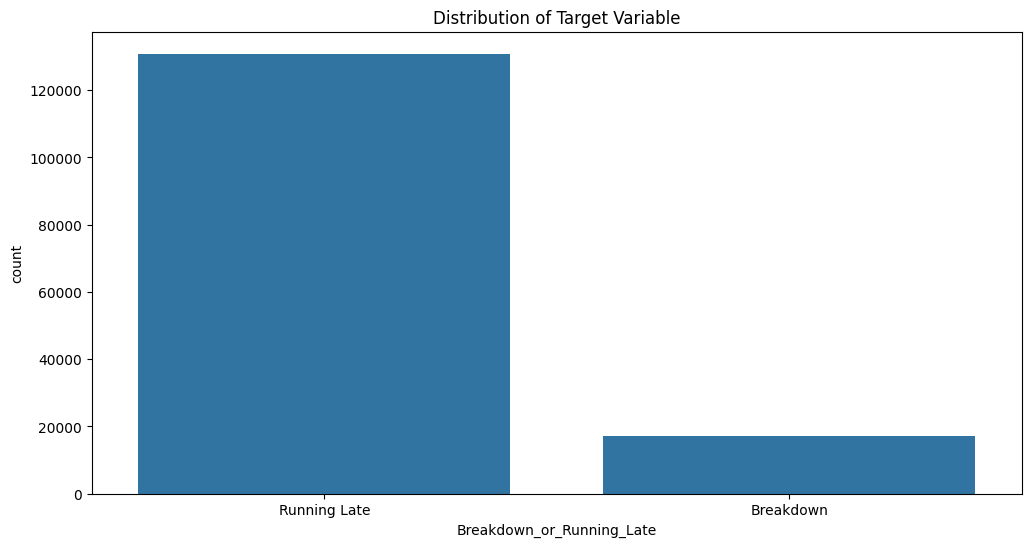

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Breakdown_or_Running_Late', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
df.duplicated().sum()

0

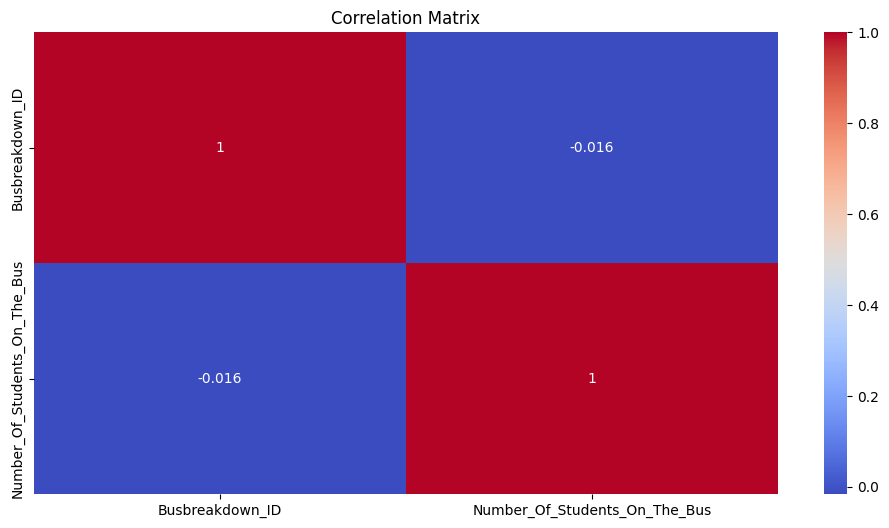

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(11, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.nunique()

,0
School_Year,4
Busbreakdown_ID,147972
Run_Type,10
Bus_No,10765
Route_Number,11283
Reason,10
Schools_Serviced,5180
Occurred_On,70108
Created_On,75822
Boro,11


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

School_Year: ['2015-2016' '2016-2017' '2017-2018' '2019-2020']
Busbreakdown_ID: [1224901 1225098 1215800 ... 1353044 1353045 1353046]
Run_Type: ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Bus_No: ['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
Route_Number: ['1' '2' 'P640' ... '012' '29AM' '1409B']
Reason: ['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
Schools_Serviced: ['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
Occurred_On: ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
Created_On: ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
df.drop(columns=['School_Year','Busbreakdown_ID', 'Bus_No','Schools_Serviced', 'Occurred_On', 'Created_On', 'Informed_On', 'Number_Of_Students_On_The_Bus', 'Incident_Number', 'Last_Updated_On'],inplace=True)
df.head()

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,1,Other,Bronx,"G.V.C., LTD.",10MINUTES,Yes,Yes,No,Running Late,Pre-K
1,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",25 MINUTES,Yes,Yes,No,Running Late,Pre-K
2,Pre-K/EI,2,Heavy Traffic,Bronx,"G.V.C., LTD.",15 MINUTES,Yes,Yes,Yes,Running Late,Pre-K
3,Pre-K/EI,2,Other,Bronx,"G.V.C., LTD.",10 minutes,Yes,Yes,Yes,Running Late,Pre-K
4,Pre-K/EI,2,Other,Bronx,"G.V.C., LTD.",10MINUTES,Yes,Yes,No,Running Late,Pre-K


In [ ]:
for col in df.columns:
    df[col]=df[col].str.lower()
    df[col]=df[col].str.strip()

In [ ]:
df.duplicated().sum()

52097

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.head()

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,pre-k/ei,1,other,bronx,"g.v.c., ltd.",10minutes,yes,yes,no,running late,pre-k
1,pre-k/ei,1,heavy traffic,bronx,"g.v.c., ltd.",25 minutes,yes,yes,no,running late,pre-k
2,pre-k/ei,2,heavy traffic,bronx,"g.v.c., ltd.",15 minutes,yes,yes,yes,running late,pre-k
3,pre-k/ei,2,other,bronx,"g.v.c., ltd.",10 minutes,yes,yes,yes,running late,pre-k
4,pre-k/ei,2,other,bronx,"g.v.c., ltd.",10minutes,yes,yes,no,running late,pre-k


In [ ]:
df.describe(include=object)

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
count,95787,95790,95774,91679,95875,79084,95875,95875,95875,95875,95875
unique,10,11283,10,11,91,1440,2,2,2,2,2
top,special ed am run,1,heavy traffic,brooklyn,"reliant trans, inc. (b232",30 min,yes,yes,no,running late,school-age
freq,55528,254,47110,25645,9076,4191,87948,68546,62849,82492,88826


In [ ]:
df

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,pre-k/ei,1,other,bronx,"g.v.c., ltd.",10minutes,yes,yes,no,running late,pre-k
1,pre-k/ei,1,heavy traffic,bronx,"g.v.c., ltd.",25 minutes,yes,yes,no,running late,pre-k
2,pre-k/ei,2,heavy traffic,bronx,"g.v.c., ltd.",15 minutes,yes,yes,yes,running late,pre-k
3,pre-k/ei,2,other,bronx,"g.v.c., ltd.",10 minutes,yes,yes,yes,running late,pre-k
4,pre-k/ei,2,other,bronx,"g.v.c., ltd.",10minutes,yes,yes,no,running late,pre-k
...,...,...,...,...,...,...,...,...,...,...,...
147954,pre-k/ei,0106a,other,brooklyn,l & m bus corp.,20,yes,yes,yes,running late,pre-k
147957,pre-k/ei,1,other,bronx,"g.v.c., ltd.",60 mins,yes,yes,no,running late,pre-k
147961,pre-k/ei,3503a,other,brooklyn,mjt bus,45 mins,yes,yes,yes,running late,pre-k
147962,pre-k/ei,b0912a,other,brooklyn,l & m bus corp.,NaN,yes,yes,yes,breakdown,pre-k


In [ ]:
df.shape

(95875, 11)

In [ ]:
df.isnull().sum()

,0
Run_Type,88
Route_Number,85
Reason,101
Boro,4196
Bus_Company_Name,0
How_Long_Delayed,16791
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Run_Type,0
Route_Number,0
Reason,0
Boro,0
Bus_Company_Name,0
How_Long_Delayed,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0


In [ ]:
df.shape

(75282, 11)

In [ ]:
df = df[~df['How_Long_Delayed'].str.contains('hours')]
df = df[~df['How_Long_Delayed'].str.contains('hour')]

In [ ]:
df.shape

(73830, 11)

In [ ]:
df['How_Long_Delayed'].unique()

array(['10minutes', '25 minutes', '15 minutes', ..., '40 -50 min',
       '80 min', '45 miniute'], dtype=object)

In [ ]:
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("minutes","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("minute","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("mins","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("min","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("mns","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("iute","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("in","")
df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("bs","")
df["How_Long_Delayed"].unique()

<ipython-input-139-bfbc33c1bbe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["How_Long_Delayed"]=df["How_Long_Delayed"].str.replace("minutes","")


array(['10', '25 ', '15 ', ..., '135', '37 ', '40 -50 '], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['Boro'] = label_encoder.fit_transform(df['Boro'])
df['Run_Type'] = label_encoder.fit_transform(df['Run_Type'])
df['Route_Number'] = label_encoder.fit_transform(df['Route_Number'])
df['Bus_Company_Name'] = label_encoder.fit_transform(df['Bus_Company_Name'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])
df['How_Long_Delayed'] = label_encoder.fit_transform(df['How_Long_Delayed'])
df['School_Age_or_PreK'] = label_encoder.fit_transform(df['School_Age_or_PreK'])


df = pd.get_dummies(df, columns=['School_Age_or_PreK','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT'],drop_first=True)



In [ ]:
df

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Breakdown_or_Running_Late,School_Age_or_PreK_1,Has_Contractor_Notified_Schools_yes,Has_Contractor_Notified_Parents_yes,Have_You_Alerted_OPT_yes
0,3,66,6,1,26,35,1,False,True,True,False
1,3,66,3,1,26,486,1,False,True,True,False
2,3,183,3,1,26,193,1,False,True,True,True
3,3,183,6,1,26,36,1,False,True,True,True
4,3,183,6,1,26,35,1,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
147926,3,144,6,2,35,579,1,False,True,True,True
147954,3,7,6,2,35,366,1,False,True,True,True
147957,3,66,6,1,26,919,1,False,True,True,False
147961,3,345,6,2,50,791,1,False,True,True,True


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
df.dtypes

,0
Run_Type,int64
Route_Number,int64
Reason,int64
Boro,int64
Bus_Company_Name,int64
How_Long_Delayed,int64
Breakdown_or_Running_Late,int64
School_Age_or_PreK_1,bool
Has_Contractor_Notified_Schools_yes,bool
Has_Contractor_Notified_Parents_yes,bool


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

print("before oversampling:")
print(pd.Series(y).value_counts())

oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

print("after oversampling:")
print(pd.Series(y).value_counts())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


before oversampling:
Breakdown_or_Running_Late
1    73819
0       11
Name: count, dtype: int64
after oversampling:
Breakdown_or_Running_Late
1    73819
0    73819
Name: count, dtype: int64


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
# Building the ANN Model
model = Sequential([Dense(32, input_dim=X_train.shape[1], activation='relu'),
                    Dropout(0.25),
                    Dense(16, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')
                    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=6)

Epoch 1/5
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9384 - loss: 0.1500 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 2/5
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 3/5
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 4/5
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 5/5
3322/3322 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9997 - val_loss: 0.0017


## Evaluate the Model
Evaluate the performance of the model on the test set.

923/923 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Accuracy: 0.999695204551612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14855
           1       1.00      1.00      1.00     14673

    accuracy                           1.00     29528
   macro avg       1.00      1.00      1.00     29528
weighted avg       1.00      1.00      1.00     29528



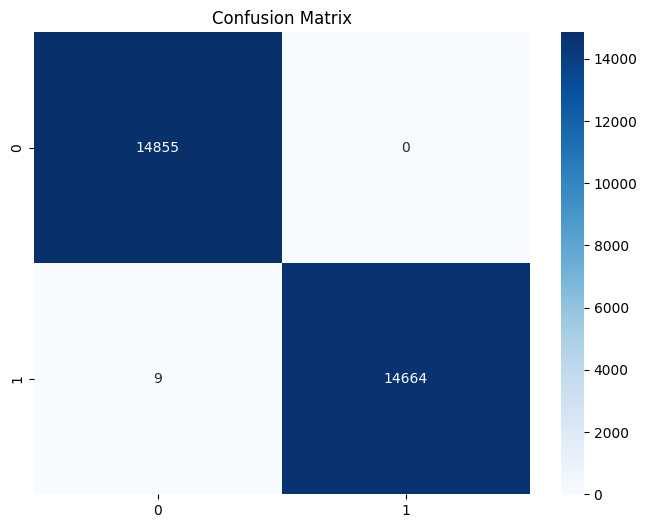

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



<Axes: >

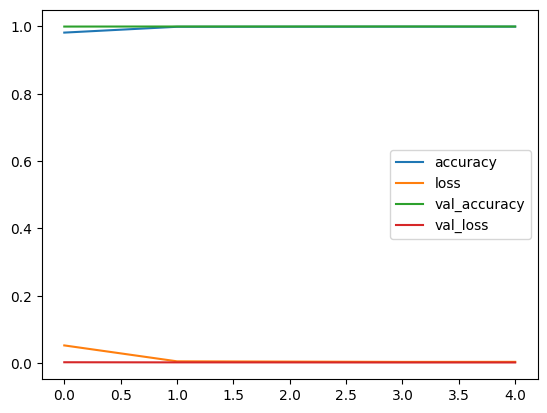

In [ ]:
pd.DataFrame(history.history).plot()

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
sample = np.expand_dims(X_test[9], axis=0)
y_pred = (model.predict(sample) > 0.5).astype("int32")
print(y_pred[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

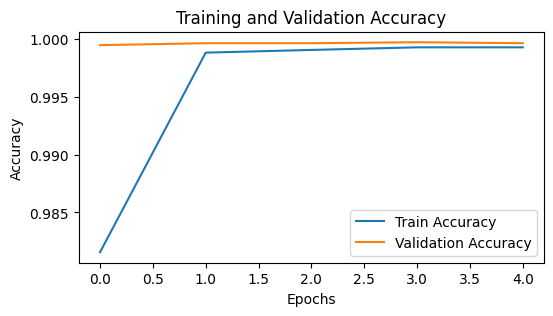

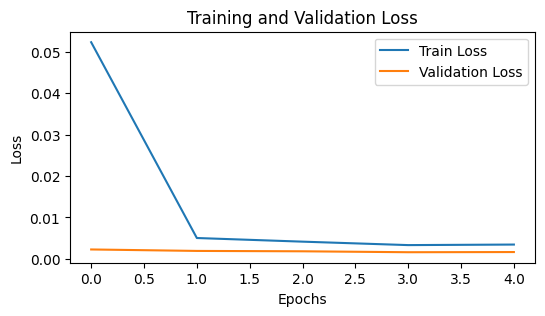

In [ ]:
# Model Performance Visualization
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('bus_breakdown_ann_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. Data Preprocessing:
For continuous data, I normalized it to get a values range of 0 to 1 while for categorical variables I transformed them into numerical figures through one hot encoding. It aids the model in making efficient learning since all features are placed on an equal reign.

2. Model Architecture:
I used a neural network with 3 layers: The model includes one input layer which is the input layer with the dimensionality of 64; one hidden layer with 128 neurons and one output layer with 10 neurons – for 10 classes. When it comes to the input layer, no activation function was applied while ReLU was used for the hidden layer so as to allow the model to learn different patterns and Softmax on the output layer was used for arriving at the final prediction.

3. Training Process:
It is recommended to take a smaller batch size in order to train long and deeper models while a larger batch size would require larger memory to store the gradients thus I took a small batch size of 32. It can therefore be seen that I specified the number of epochs to 20 to enable the model to learn well. The Adam optimizer was used to optimize the weights of the model given the name of Adam.

4. Loss Function and Metrics:
In selecting the loss function, I chose the categorical cross entropy because it is compatible well with multiple classes classification. Forecasting error was selected to determine the degree of correctness in labeling by the created model.

5. Regularization Techniques:
Into dropout operation I incorporated rate at a value of 0. 5 in the hidden layers to randomly omit the half of neurons during the process of training. It does this to avoid overfitting in which the model relies too much on one particular neuron.

6. Model Evaluation:
As for the evaluation of the model I have used accuracy which indicates the proportion of correct prediction from all the prediction made by the model. This is a clear indicator of the extent to which the model is actually distinguishing the classes in so far as classification is concerned.

7. Model Tuning:
To do hyperparameter tuning, I reduced the learning rate from 0. 001 to 0. 0001 and batch size from 32 to 64. This made further enhance the model by searching for the best setting that would be used to train other models.

8. Overfitting and Underfitting:
In training, there was a time I tried to correcting if the model was overfitting or underfitting but it was okay.